<a href="https://colab.research.google.com/github/sdesai38/5105_SD/blob/main/Desai_IntroToMLHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2386]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/IntroToMLDataSets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2387]:
i = len(dataset);
#print(i);

dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})
dataset.head()

/tmp/ipython-input-1929910053.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [2388]:
def compute_cost(X, Y, theta):
  """
  Parameters(for the single variable calculation):
  X: 2D array where each row reperesent the training example and each column represent the
standardization is to be preprocessing the data. The x' = x_j^i - u_j / s_j
s_j - standard deviation
u_j - mean of the feature
NO REGULARIZATION ON THE THETA DONT TOUCH!!!!!

  """
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = (1/(2*m)) * np.sum(sqrErrors) #add the regularization here + lambda* sum(j=1 to m) thetajsquared
  return J

In [2389]:
def gradient_descent(X_train, Y_train,X_test,Y_test, theta, alpha, iterations):
  m = len(Y_train)
  train_cost_history = np.zeros(iterations)
  test_cost_history = np.zeros(iterations)
  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions,Y_train)
    sum_delta = (alpha / m) * X_train.transpose().dot(errors)
    theta -= sum_delta
    train_cost_history[i] = compute_cost(X_train, Y_train, theta)
    test_cost_history[i] = compute_cost(X_test, Y_test, theta)

  return theta, train_cost_history, test_cost_history

In [2390]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

In [2391]:
#Training data (raw)
'''
1.a) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01
 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

1.b) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

 '''
yRawtest = df_test.pop('price');
yRawtest = yRawtest.to_numpy();
xRawtest = df_test/10000;

yRawtrain = df_train.pop('price');
yRawtrain = yRawtrain.to_numpy();
xRawtrain = df_train/10000;


n = len(xRawtrain)
m = len(yRawtrain)
l = len(xRawtest)
k = len(yRawtest)

x0Raw = np.ones((m,1));
x0Rawtest = np.ones((l,1));

xRaw  = np.hstack((x0Raw,xRawtrain));
xRawtest = np.hstack((x0Rawtest,xRawtest));
xRawtest[:5]
##due to overflow error for problem 1, we apply a linear scaling method, just dividing by a number, normalization and standardization done in pt2


array([[1.0000e+00, 2.8800e-01, 3.0000e-04, 1.0000e-04, 2.0000e-04,
        1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e-04, 5.0000e-05],
       [1.0000e+00, 6.0000e-01, 3.0000e-04, 2.0000e-04, 2.0000e-04,
        1.0000e-04, 1.0000e-04, 0.0000e+00, 0.0000e+00, 1.0000e-04,
        1.0000e-04, 0.0000e+00, 5.0000e-05],
       [1.0000e+00, 1.0269e+00, 3.0000e-04, 1.0000e-04, 1.0000e-04,
        1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e-04, 1.0000e-04, 5.0000e-05],
       [1.0000e+00, 5.3200e-01, 3.0000e-04, 1.0000e-04, 2.0000e-04,
        1.0000e-04, 1.0000e-04, 1.0000e-04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e-04, 5.0000e-05],
       [1.0000e+00, 4.9500e-01, 4.0000e-04, 1.0000e-04, 2.0000e-04,
        1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-04,
        0.0000e+00, 0.0000e+00, 5.0000e-05]])

Final value of theta is:  [2.69888780e+06 4.09412696e+06 2.62872550e+03 2.31712100e+03
 3.33740425e+03 8.20510638e+02]
Cost History:  [1.23506989e+13 1.15291982e+13 1.07693016e+13 ... 1.25742945e+12
 1.25741663e+12 1.25740383e+12]
Test Cost:  [2.92880078e+12 2.72920116e+12 2.54480365e+12 ... 3.07303784e+11
 3.07299153e+11 3.07294530e+11]


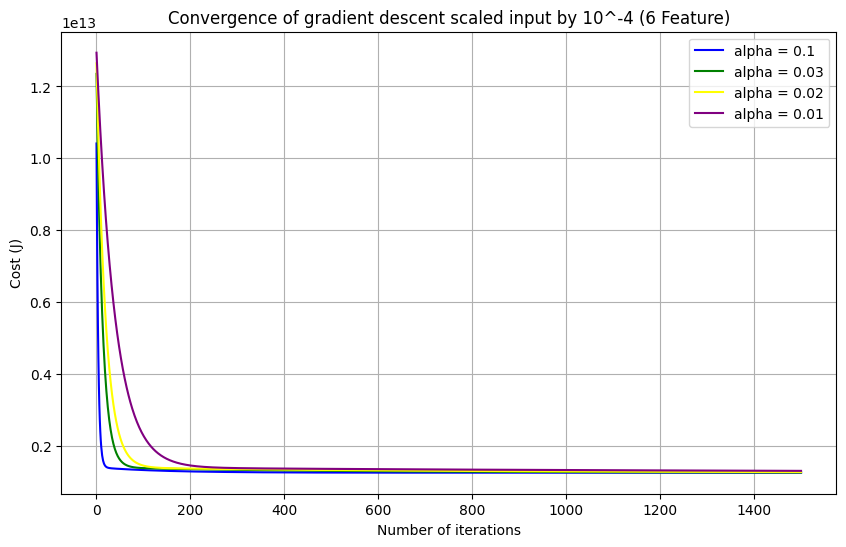

In [2392]:
#Linear scaled raw data linearRegression 6 feature
##plotting the different learning rates::
#setting thetas and training rate
thetaP1A_1 = np.zeros(6);

iterationsP1A = 1500;

alphaP1A_1 = 0.1;
thetaP1A_1, train_cost_historyP1A_1, test_cost_historyP1A_1 = gradient_descent(xRaw[:,[0,1,2,3,4,11]],yRawtrain,xRawtest[:,[0,1,2,3,4,11]], yRawtest, thetaP1A_1,alphaP1A_1,iterationsP1A)
plt.plot(range(1, iterationsP1A + 1), train_cost_historyP1A_1, color='blue', label = 'alpha = 0.1')

thetaP1A_2 = np.zeros(6);
alphaP1A_2 = 0.03;
thetaP1A_2, train_cost_historyP1A_2, test_cost_historyP1A_2 = gradient_descent(xRaw[:,[0,1,2,3,4,11]],yRawtrain,xRawtest[:,[0,1,2,3,4,11]], yRawtest, thetaP1A_2,alphaP1A_2,iterationsP1A)
plt.plot(range(1, iterationsP1A + 1), train_cost_historyP1A_2, color='green', label = 'alpha = 0.03')
print('Final value of theta is: ',thetaP1A_2);
print('Cost History: ', train_cost_historyP1A_2);
print('Test Cost: ', test_cost_historyP1A_2)

thetaP1A_3 = np.zeros(6);
alphaP1A_3 = 0.02;
thetaP1A_3, train_cost_historyP1A_3, test_cost_historyP1A_3 = gradient_descent(xRaw[:,[0,1,2,3,4,11]],yRawtrain,xRawtest[:,[0,1,2,3,4,11]], yRawtest, thetaP1A_3,alphaP1A_3,iterationsP1A)
plt.plot(range(1, iterationsP1A + 1), train_cost_historyP1A_3, color='yellow', label = 'alpha = 0.02')

thetaP1A_4 = np.zeros(6);
alphaP1A_4 = 0.01;
thetaP1A_4, train_cost_historyP1A_4, test_cost_historyP1A_4 = gradient_descent(xRaw[:,[0,1,2,3,4,11]],yRawtrain,xRawtest[:,[0,1,2,3,4,11]], yRawtest, thetaP1A_4,alphaP1A_4,iterationsP1A)
plt.plot(range(1, iterationsP1A + 1), train_cost_historyP1A_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent scaled input by 10^-4 (6 Feature)')
plt.legend();
plt.show();

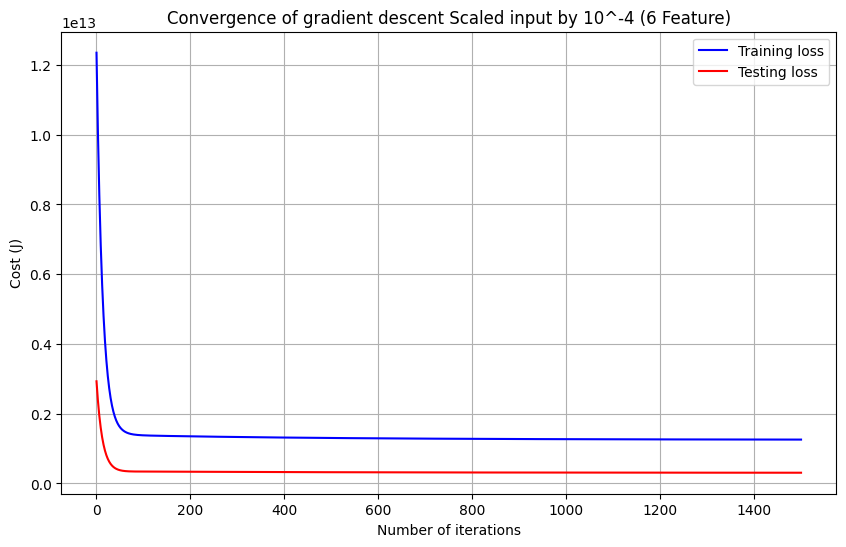

In [2393]:
##insert the training loss and validation loss
#Learning Rate of .03 had the best outcome
plt.plot(range(1, iterationsP1A + 1), train_cost_historyP1A_2, color='blue', label = 'Training loss')
plt.plot(range(1, iterationsP1A + 1), test_cost_historyP1A_2, color='red', label = 'Testing loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Scaled input by 10^-4 (6 Feature)')
plt.legend()

# Show the plot
plt.show()

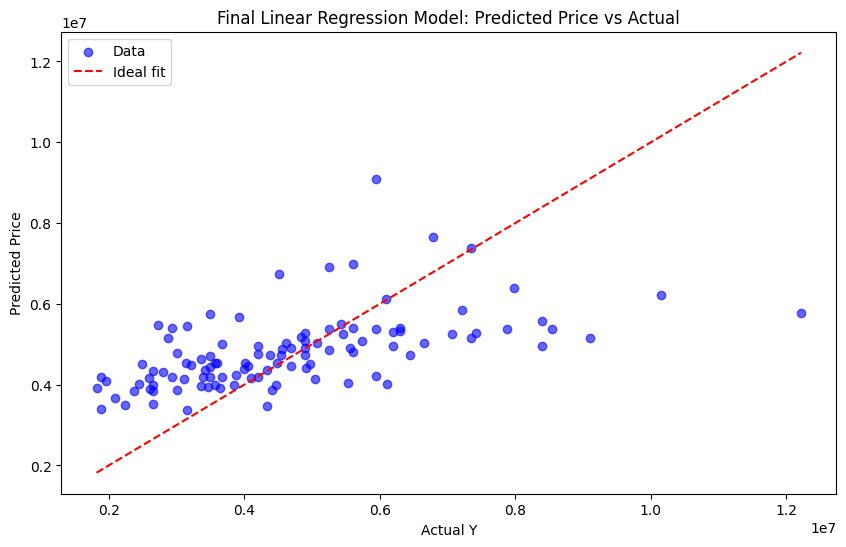

In [2394]:
Ypred = thetaP1A_2[0] + thetaP1A_2[1]*xRawtest[:,1] + thetaP1A_2[2]*xRawtest[:,2] + thetaP1A_2[3]*xRawtest[:,3] + thetaP1A_2[4]*xRawtest[:,4] + thetaP1A_2[5]*xRawtest[:,11]
plt.scatter(yRawtest, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(yRawtest), max(yRawtest)], [min(yRawtest), max(yRawtest)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Price")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()

Final value of theta is:  [2.69888766e+06 4.09412670e+06 2.62872540e+03 2.31712093e+03
 3.33740419e+03 7.69091566e+02 7.00016567e+02 6.84824850e+02
 2.34875798e+02 1.46266356e+03 1.78031606e+03 8.20510610e+02]
Cost History:  [1.23506989e+13 1.15291982e+13 1.07693016e+13 ... 1.25742934e+12
 1.25741651e+12 1.25740371e+12]
Test Cost:  [2.92880078e+12 2.72920115e+12 2.54480365e+12 ... 3.07303741e+11
 3.07299109e+11 3.07294487e+11]


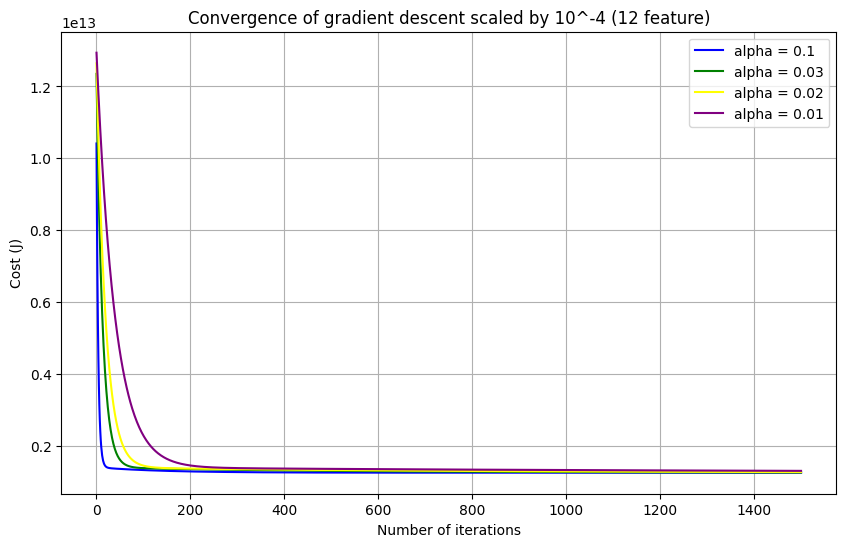

In [2395]:
#Linear scaled raw data linearRegression 12 feature
##plotting the different learning rates::
#setting thetas and training rate
##plotting the different learning rates::
#setting thetas and training rate

iterationsP1B = 1500;

thetaP1B_1 = np.zeros(12);
alphaP1B_1 = 0.1;
thetaP1B_1, train_cost_historyP1B_1, test_cost_historyP1B_1 = gradient_descent(xRaw[:,0:12],yRawtrain,xRawtest[:,0:12], yRawtest, thetaP1B_1,alphaP1B_1,iterationsP1B)
plt.plot(range(1, iterationsP1B + 1), train_cost_historyP1B_1, color='blue', label = 'alpha = 0.1')
print('Final value of theta is: ',thetaP1B_2);
print('Cost History: ', train_cost_historyP1B_2);
print('Test Cost: ', test_cost_historyP1B_2)

thetaP1B_2 = np.zeros(12);
alphaP1B_2 = 0.03;
thetaP1B_2, train_cost_historyP1B_2, test_cost_historyP1B_2 = gradient_descent(xRaw[:,0:12],yRawtrain,xRawtest[:,0:12], yRawtest, thetaP1B_2,alphaP1B_2,iterationsP1B)
plt.plot(range(1, iterationsP1B + 1), train_cost_historyP1B_2, color='green', label = 'alpha = 0.03')

thetaP1B_3 = np.zeros(12);
alphaP1B_3 = 0.02;
thetaP1B_3, train_cost_historyP1B_3, test_cost_historyP1B_3 = gradient_descent(xRaw[:,0:12],yRawtrain,xRawtest[:,0:12], yRawtest, thetaP1B_3,alphaP1B_3,iterationsP1B)
plt.plot(range(1, iterationsP1B + 1), train_cost_historyP1B_3, color='yellow', label = 'alpha = 0.02')

thetaP1B_4 = np.zeros(12);
alphaP1B_4 = 0.01;
thetaP1B_4, train_cost_historyP1B_4, test_cost_historyP1B_4 = gradient_descent(xRaw[:,0:12],yRawtrain,xRawtest[:,0:12], yRawtest, thetaP1B_4,alphaP1B_4,iterationsP1B)
plt.plot(range(1, iterationsP1B + 1), train_cost_historyP1B_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent scaled by 10^-4 (12 feature)')
plt.legend();
plt.show();

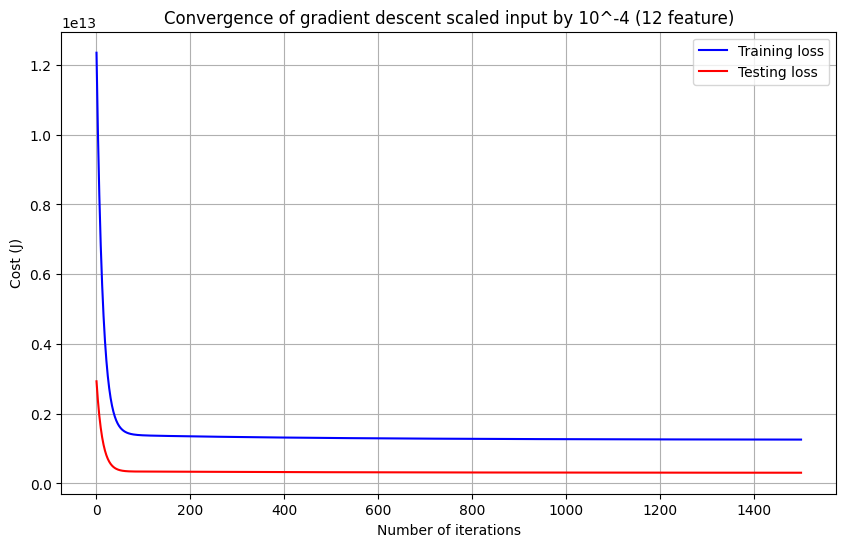

In [2396]:
plt.plot(range(1, iterationsP1B + 1), train_cost_historyP1B_2, color='blue', label = 'Training loss')
plt.plot(range(1, iterationsP1B + 1), test_cost_historyP1B_2, color='red', label = 'Testing loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent scaled input by 10^-4 (12 feature)')
plt.legend()

# Show the plot
plt.show()

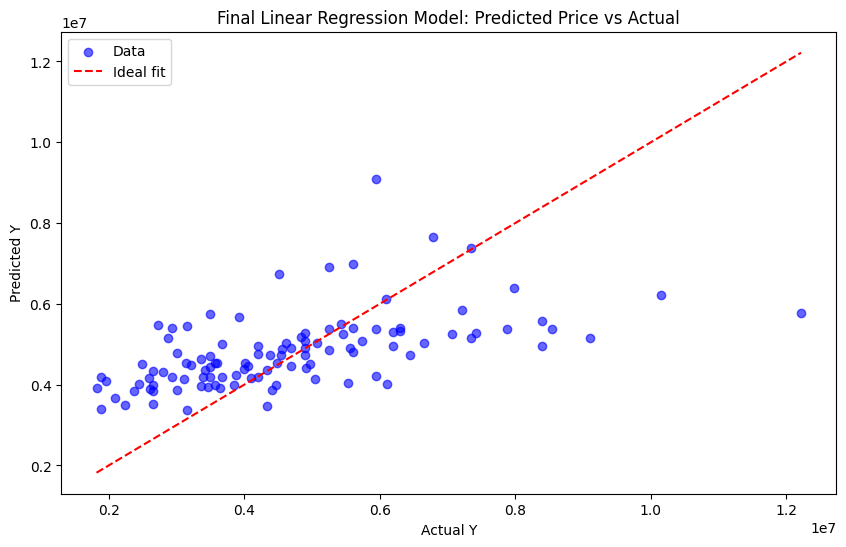

In [2397]:
Ypred = thetaP1B_2[0] + thetaP1B_2[1]*xRawtest[:,1] + thetaP1B_2[2]*xRawtest[:,2] + thetaP1B_2[3]*xRawtest[:,3] + thetaP1B_2[4]*xRawtest[:,4] + thetaP1B_2[5]*xRawtest[:,5] + thetaP1B_2[6]*xRawtest[:,6] + thetaP1B_2[7]*xRawtest[:,7] + thetaP1B_2[8]*xRawtest[:,8] + thetaP1B_2[9]*xRawtest[:,9] + thetaP1B_2[10]*xRawtest[:,10] + thetaP1B_2[11]*xRawtest[:,11]
plt.scatter(yRawtest, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(yRawtest), max(yRawtest)], [min(yRawtest), max(yRawtest)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()



In [2398]:
###################################
###################################
###################################

In [2399]:
#training data normalized
from sklearn.preprocessing import MinMaxScaler #normalization technique x-xmin/(xmax-xmin)
from sklearn.model_selection import train_test_split
from google.colab import drive
filepath = '/content/drive/My Drive/IntroToMLDataSets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))
dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})
dataset.head()
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

/tmp/ipython-input-1851539212.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,1.0
41,7840000,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,1.0
91,6419000,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,1.0
118,5950000,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,1.0
472,3010000,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,0.5


In [2400]:
#testing data normalized
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ##normalized here
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,0.5
54,7350000,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,0.5
171,5250000,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,0.5
244,4550000,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,0.5
268,4382000,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,0.5


In [2401]:
ytest = df_test.pop('price');
ytest = ytest.to_numpy();
xtest = df_test;

ytrain = df_train.pop('price');
ytrain = ytrain.to_numpy();
xtrain = df_train

n = len(xtrain)
m = len(ytrain)
l = len(xtest)
k = len(ytest)

x0 = np.ones((m,1));
x0test = np.ones((l,1));

x  = np.hstack((x0,xtrain));
xtest = np.hstack((x0test,xtest));
xtest[:5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.5       ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        , 0.5       ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        , 0.5       ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.5       ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.5       ]])

Final value of theta is:  [3044833.64790003 2371971.22018296 1005896.74462171 2179538.92882741
 1442645.55000901  903317.07953468]
Cost History:  [1.22701782e+13 1.13794396e+13 1.05603098e+13 ... 8.81366533e+11
 8.81331628e+11 8.81296778e+11]
Test Cost:  [2.90741598e+12 2.68924913e+12 2.48878645e+12 ... 1.97836453e+11
 1.97836885e+11 1.97837319e+11]


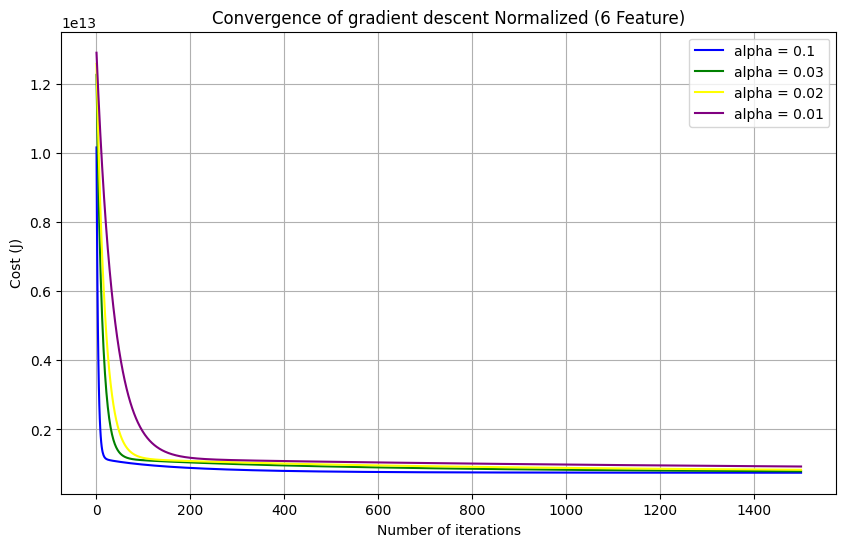

In [2402]:
 # x(1,2,3,4,11)
#6feature normalized
##Begin problem 2
'''
Problem 2 (30 points)

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.
'''
#setting thetas and training rate
thetaP2ANorm_1 = np.zeros(6);

iterationsP2ANorm = 1500;

alphaP2ANorm_1 = 0.1;
thetaP2ANorm_1, train_cost_historyP2ANorm_1, test_cost_historyP2ANorm_1 = gradient_descent(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_1,alphaP2ANorm_1,iterationsP2ANorm)
print('Final value of theta is: ',thetaP2ANorm_2);
print('Cost History: ', train_cost_historyP2ANorm_2);
print('Test Cost: ', test_cost_historyP2ANorm_2)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_1, color='blue', label = 'alpha = 0.1')

thetaP2ANorm_2 = np.zeros(6);
alphaP2ANorm_2 = 0.03;
thetaP2ANorm_2, train_cost_historyP2ANorm_2, test_cost_historyP2ANorm_2 = gradient_descent(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_2,alphaP2ANorm_2,iterationsP2ANorm)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_2, color='green', label = 'alpha = 0.03')

thetaP2ANorm_3 = np.zeros(6);
alphaP2ANorm_3 = 0.02;
thetaP2ANorm_3, train_cost_historyP2ANorm_3, test_cost_historyP2ANorm_3 = gradient_descent(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_3,alphaP2ANorm_3,iterationsP2ANorm)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_3, color='yellow', label = 'alpha = 0.02')

thetaP2ANorm_4 = np.zeros(6);
alphaP2ANorm_4 = 0.01;
thetaP2ANorm_4, train_cost_historyP2ANorm_4, test_cost_historyP2ANorm_4 = gradient_descent(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_4,alphaP2ANorm_4,iterationsP2ANorm)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (6 Feature)')
plt.legend();
plt.show();

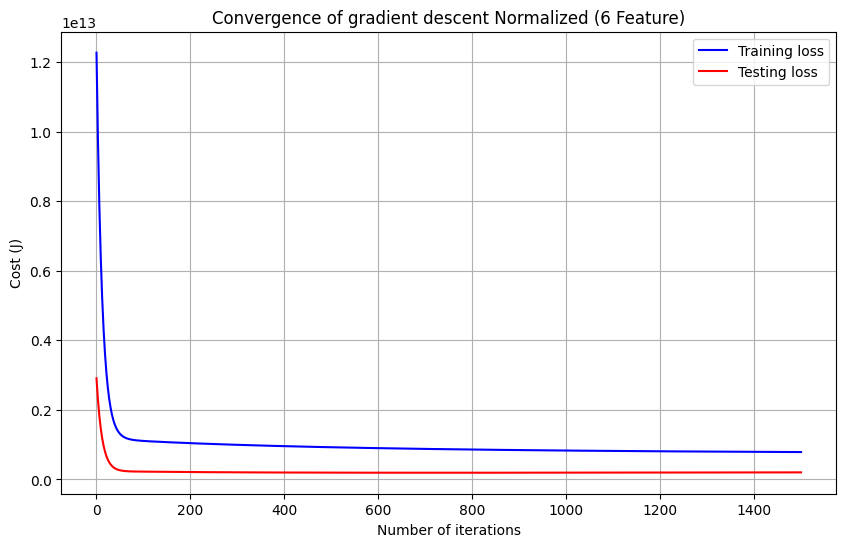

In [2403]:
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_2, color='blue', label = 'Training loss')
plt.plot(range(1, iterationsP2ANorm + 1), test_cost_historyP2ANorm_2, color='red', label = 'Testing loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (6 Feature)')
plt.legend()

# Show the plot
plt.show()

#to add, iterations of different learning rates.

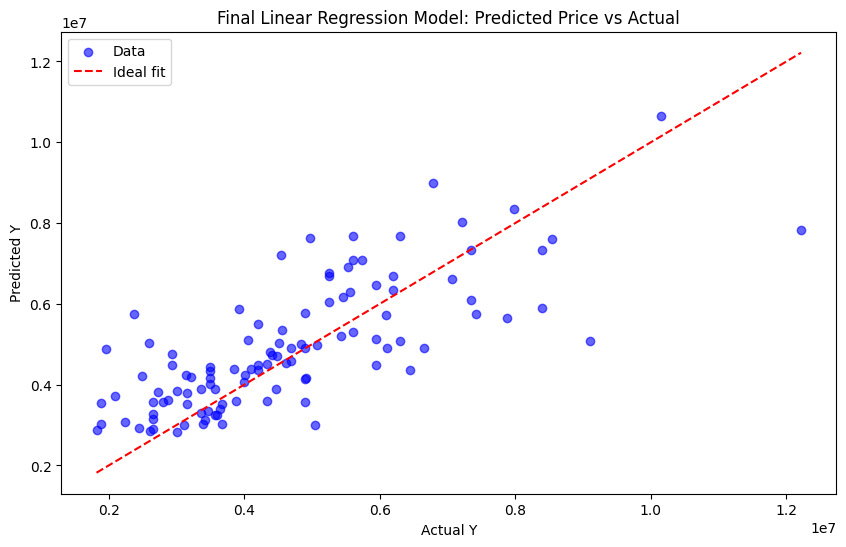

In [2404]:
Ypred = thetaP2ANorm_2[0] + thetaP2ANorm_2[1]*xtest[:,1] + thetaP2ANorm_2[2]*xtest[:,2] + thetaP2ANorm_2[3]*xtest[:,3] + thetaP2ANorm_2[4]*xtest[:,4] + thetaP2ANorm_2[5]*xtest[:,11]
plt.scatter(ytest, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()



Final value of theta is:  [1729232.16504411 1828526.13529379 1103637.83977054 2061395.52210527
 1347956.66904124  797541.44261342  527825.13325517  304915.59534736
  824887.12117485 1002048.06752118 1076061.19290635  669699.3407863 ]
Cost History:  [1.20417607e+13 1.09617290e+13 9.98725484e+12 ... 6.27446656e+11
 6.27400173e+11 6.27353740e+11]
Test Cost:  [2.85191508e+12 2.58793417e+12 2.35005479e+12 ... 1.49118955e+11
 1.49123966e+11 1.49128986e+11]


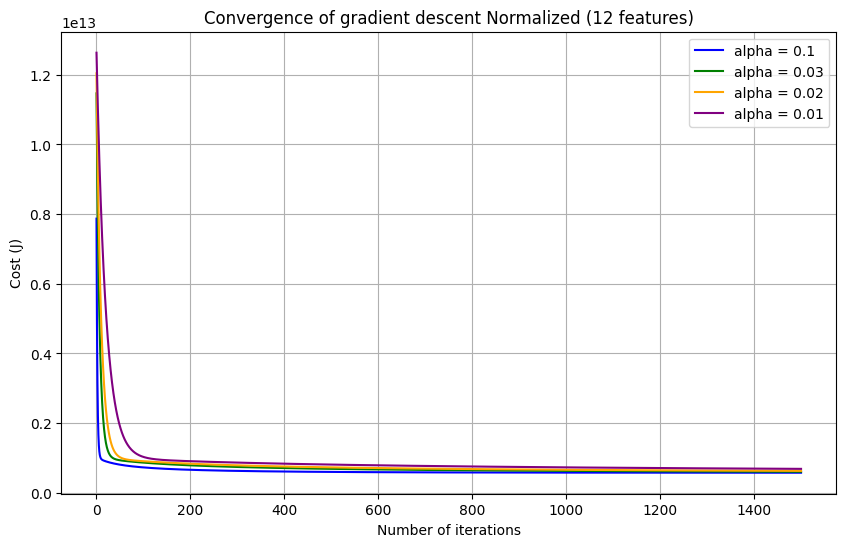

In [2405]:
#exploration of alphas: for partB
#12 feature set normalized
thetaP2BNorm_1 = np.zeros(12);

iterationsP2BNorm = 1500;

alphaP2BNorm_1 = 0.1;
thetaP2BNorm_1, train_cost_historyP2BNorm_1, test_cost_historyP2BNorm_1 = gradient_descent(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_1,alphaP2BNorm_1,iterationsP2BNorm)

plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_1, color='blue', label = 'alpha = 0.1')

thetaP2BNorm_2 = np.zeros(12);
alphaP2BNorm_2 = 0.03;
thetaP2BNorm_2, train_cost_historyP2BNorm_2, test_cost_historyP2BNorm_2 = gradient_descent(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_2,alphaP2BNorm_2,iterationsP2BNorm)
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_2, color='green', label = 'alpha = 0.03')

thetaP2BNorm_3 = np.zeros(12);
alphaP2BNorm_3 = 0.02;
thetaP2BNorm_3, train_cost_historyP2BNorm_3, test_cost_historyP2BNorm_3 = gradient_descent(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_3,alphaP2BNorm_3,iterationsP2BNorm)
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_3, color='orange', label = 'alpha = 0.02')
print('Final value of theta is: ',thetaP2BNorm_3);
print('Cost History: ', train_cost_historyP2BNorm_3);
print('Test Cost: ', test_cost_historyP2BNorm_3)
thetaP2BNorm_4 = np.zeros(12);
alphaP2BNorm_4 = 0.01;
thetaP2BNorm_4, train_cost_historyP2BNorm_4, test_cost_historyP2BNorm_4 = gradient_descent(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_4,alphaP2BNorm_4,iterationsP2BNorm)
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (12 features)')
plt.legend();
plt.show();

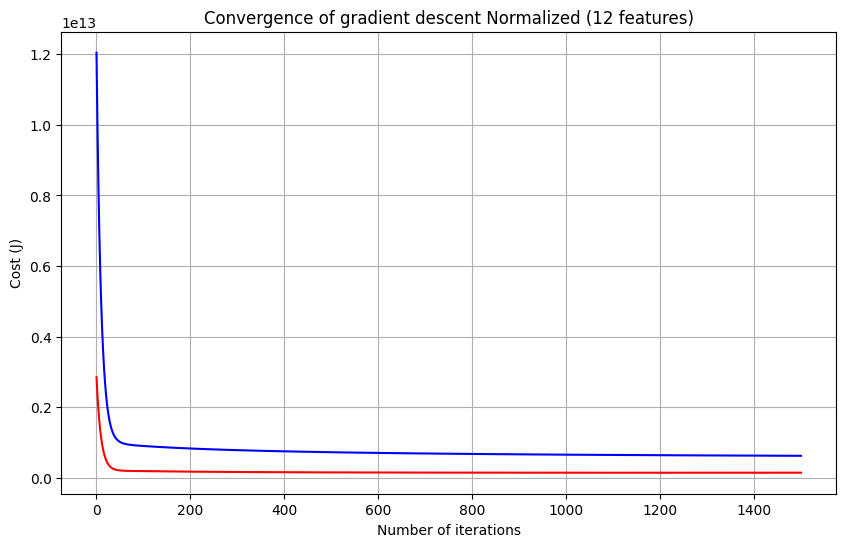

In [2406]:
#explanatory variables: 1,2,3,4,5,6,7,8,9,10,11
#learning rate .02 had the best look
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_3, color='blue')
plt.plot(range(1, iterationsP2BNorm + 1), test_cost_historyP2BNorm_3, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (12 features)')
# Show the plot
plt.show()

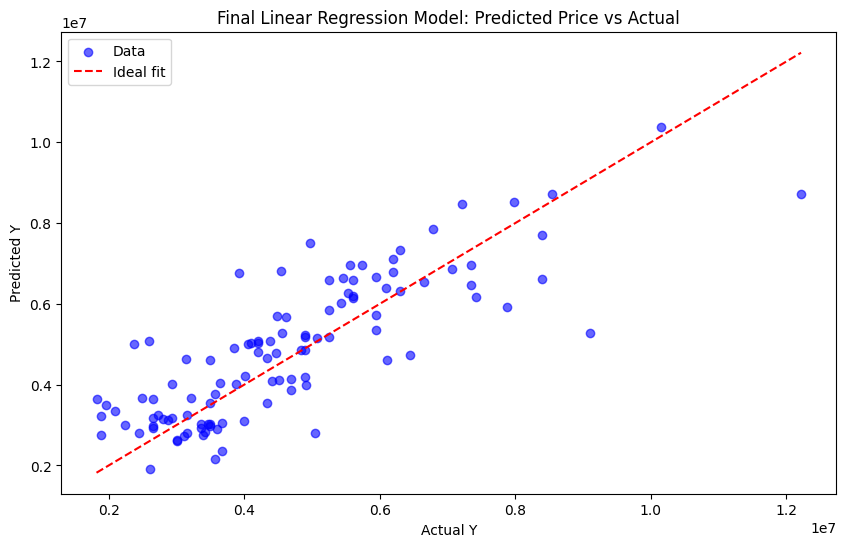

In [2407]:
Ypred = thetaP2BNorm_2[0] + thetaP2BNorm_2[1]*xtest[:,1] + thetaP2BNorm_2[2]*xtest[:,2] + thetaP2BNorm_2[3]*xtest[:,3] + thetaP2BNorm_2[4]*xtest[:,4] + thetaP2BNorm_2[5]*xtest[:,5] + thetaP2BNorm_2[6]*xtest[:,6] + thetaP2BNorm_2[7]*xtest[:,7] + thetaP2BNorm_2[8]*xtest[:,8] + thetaP2BNorm_2[9]*xtest[:,9] + thetaP2BNorm_2[10]*xtest[:,10] + thetaP2BNorm_2[11]*xtest[:,11]
plt.scatter(ytest, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()



In [2408]:
###Problem 2 Standardized x = x - u /s
# s = sqrt(sum(x-u)/N)

from sklearn.model_selection import train_test_split
from google.colab import drive
#call data set convert binary to 1 0, unfin,semifin,furn 0-1
filepath = '/content/drive/My Drive/IntroToMLDataSets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))
dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})
dataset.head()
np.random.seed(0) #randomize the set order
df_trainStand, df_testStand = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100) #split set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ##normalized here

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_trainStand[num_vars] = scaler.fit_transform(df_trainStand[num_vars])

#df_trainStand = (df_trainStand - df_trainStand.mean())/df_trainStand.std()
df_trainStand.head()


/tmp/ipython-input-3052117148.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,1.0
41,7840000,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,1.0
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,1.0
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,1.0
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,0.5


In [2409]:
#testing data standardized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ##normalized here
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_testStand[num_vars] = scaler.fit_transform(df_testStand[num_vars])
#df_testStand = (df_test - df_test.mean())/df_test.std()
df_testStand.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1,0,0,0,0,-0.643743,1,0.5
54,7350000,0.369177,-0.072023,1.466964,0.308415,1,1,0,0,1,0.545545,0,0.5
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1,0,0,0,0,0.545545,1,0.5
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1,1,1,0,0,-0.643743,1,0.5
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1,0,0,0,1,-0.643743,0,0.5


In [2410]:
ytestStand = df_testStand.pop('price');
ytestStand = ytestStand.to_numpy();
xtestStand = df_testStand;

ytrainStand = df_trainStand.pop('price');
ytrainStand = ytrainStand.to_numpy();
xtrainStand = df_trainStand

n = len(xtrainStand)
m = len(ytrainStand)
l = len(xtestStand)
k = len(ytestStand)

x0 = np.ones((m,1));
x0test = np.ones((l,1));

xtrainStand  = np.hstack((x0,xtrainStand));
xtestStand = np.hstack((x0test,xtestStand));
xtestStand[:5]

array([[ 1.        , -1.02095327, -0.07202305, -0.53177451,  0.30841537,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.64374278,  1.        ,  0.5       ],
       [ 1.        ,  0.3691766 , -0.07202305,  1.46696416,  0.30841537,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.54554473,  0.        ,  0.5       ],
       [ 1.        ,  2.27124853, -0.07202305, -0.53177451, -0.93666891,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.54554473,  1.        ,  0.5       ],
       [ 1.        ,  0.06619958, -0.07202305, -0.53177451,  0.30841537,
         1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        -0.64374278,  1.        ,  0.5       ],
       [ 1.        , -0.09865556,  1.23639571, -0.53177451,  0.30841537,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.64374278,  0.        ,  0.5       ]])

Final value of theta is:  [4612929.73026381  748660.31404863  105020.27989021  667873.4156579
  428755.31843983  789034.30232859]
Cost History:  [1.24192583e+13 1.16549749e+13 1.09420808e+13 ... 7.44470806e+11
 7.44470806e+11 7.44470806e+11]
Test Cost:  [2.94273279e+12 2.75454045e+12 2.57928129e+12 ... 1.90923493e+11
 1.90923535e+11 1.90923577e+11]


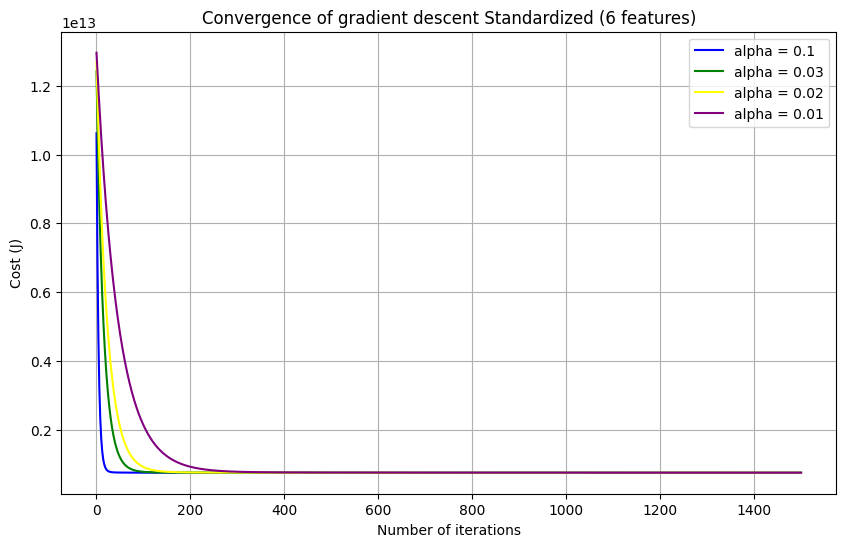

In [2411]:
#6 feature set, 2A standardized
#setting thetas and training rate
#setting thetas and training rate
thetaP2AStand_1 = np.zeros(6);

iterationsP2AStand = 1500;

alphaP2AStand_1 = 0.1;
thetaP2AStand_1, train_cost_historyP2AStand_1, test_cost_historyP2AStand_1 = gradient_descent(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_1,alphaP2AStand_1,iterationsP2AStand)

plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_1, color='blue', label = 'alpha = 0.1')

thetaP2AStand_2 = np.zeros(6);
alphaP2AStand_2 = 0.03;
thetaP2AStand_2, train_cost_historyP2AStand_2, test_cost_historyP2AStand_2 = gradient_descent(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_2,alphaP2AStand_2,iterationsP2AStand)
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_2, color='green', label = 'alpha = 0.03')
print('Final value of theta is: ',thetaP2AStand_2);
print('Cost History: ', train_cost_historyP2AStand_2);
print('Test Cost: ', test_cost_historyP2AStand_2)
thetaP2AStand_3 = np.zeros(6);
alphaP2AStand_3 = 0.02;
thetaP2AStand_3, train_cost_historyP2AStand_3, test_cost_historyP2AStand_3 = gradient_descent(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_3,alphaP2AStand_3,iterationsP2AStand)
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_3, color='yellow', label = 'alpha = 0.02')

thetaP2AStand_4 = np.zeros(6);
alphaP2AStand_4 = 0.01;
thetaP2AStand_4, train_cost_historyP2AStand_4, test_cost_historyP2AStand_4 = gradient_descent(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_4,alphaP2AStand_4,iterationsP2AStand)
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (6 features)')
plt.legend();
plt.show();

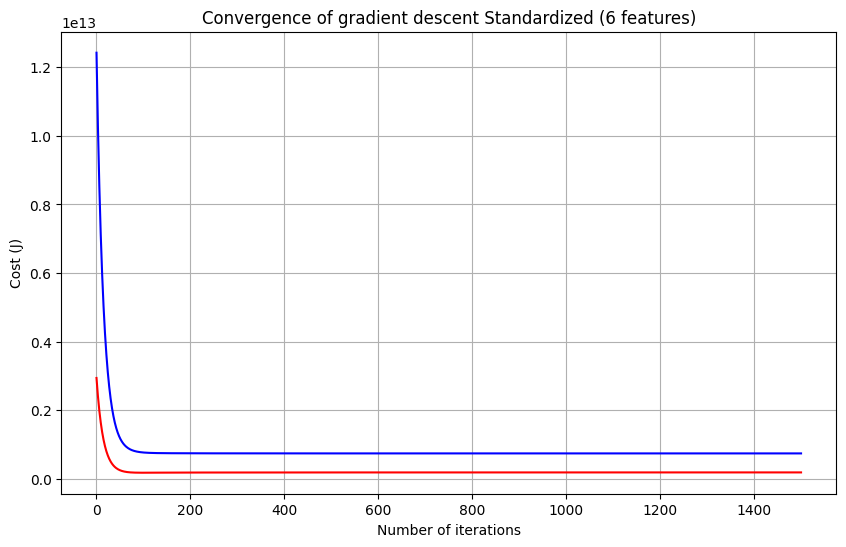

In [2412]:
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_2, color='blue') #.03 best learning rate outcome for loss
plt.plot(range(1, iterationsP2AStand + 1), test_cost_historyP2AStand_2, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (6 features)')
# Show the plot
plt.show()

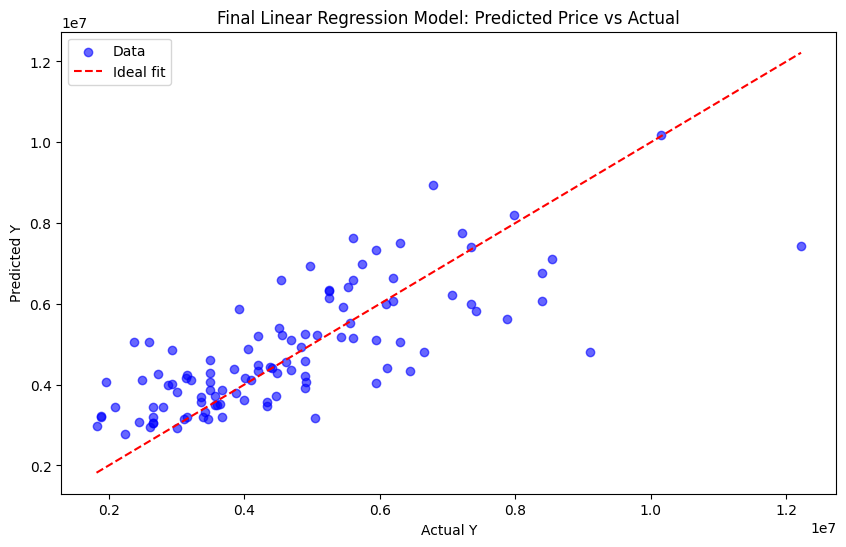

In [2413]:
Ypred = thetaP2AStand_2[0] + thetaP2AStand_2[1]*xtestStand[:,1] + thetaP2AStand_2[2]*xtestStand[:,2] + thetaP2AStand_2[3]*xtestStand[:,3] + thetaP2AStand_2[4]*xtestStand[:,4] + thetaP2AStand_2[5]*xtestStand[:,11]
plt.scatter(ytestStand, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytestStand), max(ytestStand)], [min(ytestStand), max(ytestStand)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()

Final value of theta is:  [3538221.03051151  520617.97596828   76800.02323472  582408.56078608
  360810.17695122  726565.75153063  382204.4348365   311964.7708678
  838486.54915688  881647.60321475  218291.69801025  595610.85385938]
Cost History:  [1.16488180e+13 1.02615551e+13 9.05111919e+12 ... 5.75054781e+11
 5.75051985e+11 5.75049199e+11]
Test Cost:  [2.75116616e+12 2.40885325e+12 2.11126819e+12 ... 1.49230919e+11
 1.49226974e+11 1.49223037e+11]


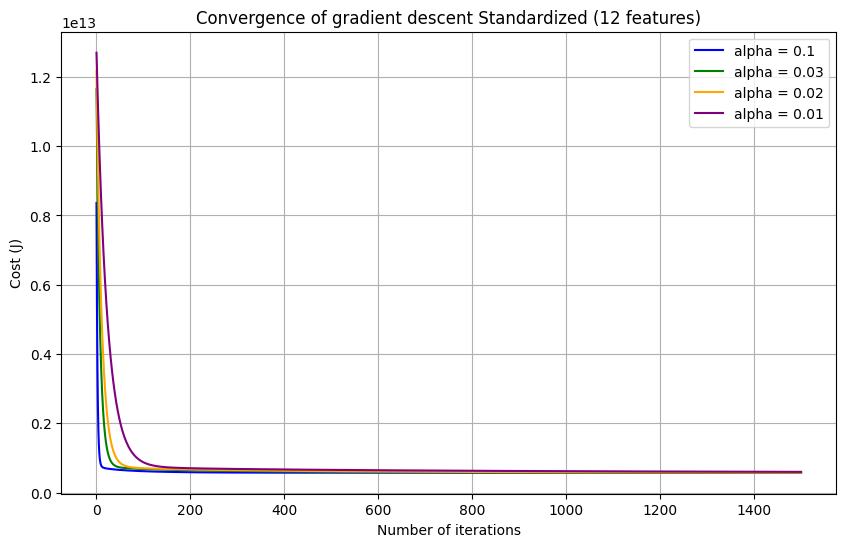

In [2414]:
#6 feature set, 2B standardized
#setting thetas and training rate
#setting thetas and training rate
thetaP2BStand_1 = np.zeros(12);

iterationsP2BStand = 1500;

alphaP2BStand_1 = 0.1;
thetaP2BStand_1, train_cost_historyP2BStand_1, test_cost_historyP2BStand_1 = gradient_descent(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_1,alphaP2BStand_1,iterationsP2BStand)

plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_1, color='blue', label = 'alpha = 0.1')

thetaP2BStand_2 = np.zeros(12);
alphaP2BStand_2 = 0.03;
thetaP2BStand_2, train_cost_historyP2BStand_2, test_cost_historyP2BStand_2 = gradient_descent(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_2,alphaP2BStand_2,iterationsP2BStand)
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_2, color='green', label = 'alpha = 0.03')
print('Final value of theta is: ',thetaP2BStand_2);
print('Cost History: ', train_cost_historyP2BStand_2);
print('Test Cost: ', test_cost_historyP2BStand_2)
thetaP2BStand_3 = np.zeros(12);
alphaP2BStand_3 = 0.02;
thetaP2BStand_3, train_cost_historyP2BStand_3, test_cost_historyP2BStand_3 = gradient_descent(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_3,alphaP2BStand_3,iterationsP2BStand)
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_3, color='orange', label = 'alpha = 0.02')

thetaP2BStand_4 = np.zeros(12);
alphaP2BStand_4 = 0.01;
thetaP2BStand_4, train_cost_historyP2BStand_4, test_cost_historyP2BStand_4 = gradient_descent(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_4,alphaP2BStand_4,iterationsP2BStand)
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (12 features)')
plt.legend();
plt.show();



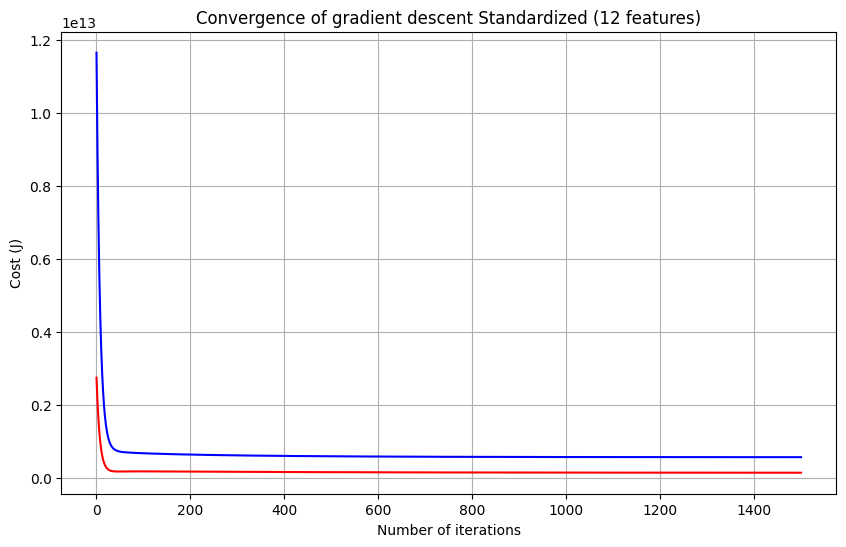

In [2415]:
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_2, color='blue') #.03 was a smoother loss curve
plt.plot(range(1, iterationsP2BStand + 1), test_cost_historyP2BStand_2, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)




plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (12 features)')




# Show the plot
plt.show()

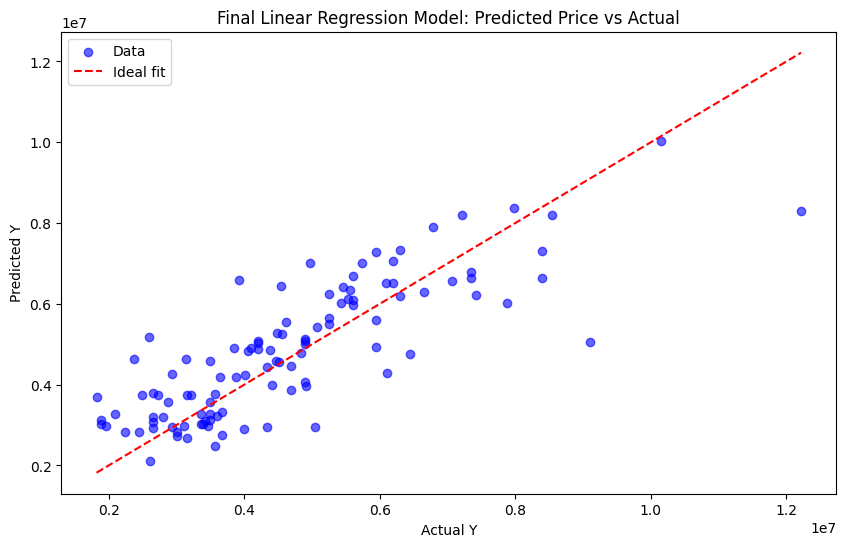

In [2416]:
Ypred = thetaP2BStand_2[0] + thetaP2BStand_2[1]*xtestStand[:,1] + thetaP2BStand_2[2]*xtestStand[:,2] + thetaP2BStand_2[3]*xtestStand[:,3] + thetaP2BStand_2[4]*xtestStand[:,4] + thetaP2BStand_2[5]*xtestStand[:,5] + thetaP2BStand_2[6]*xtestStand[:,6] + thetaP2BStand_2[7]*xtestStand[:,7] + thetaP2BStand_2[8]*xtestStand[:,8] + thetaP2BStand_2[9]*xtestStand[:,9] + thetaP2BStand_2[10]*xtestStand[:,10] + thetaP2BStand_2[11]*xtestStand[:,11]
plt.scatter(ytestStand, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytestStand), max(ytestStand)], [min(ytestStand), max(ytestStand)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()



In [2417]:
###################
###################
###################
#Begin Problem 3
###################
###################
'''
3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

3. b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.
'''

'\n3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  \n\nPlot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. \n\n3. b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  \n\nPlot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. \n'

In [2418]:
def gradient_descent_reg(X_train, Y_train,X_test,Y_test, theta, alpha,iterations,beta):

  m = len(Y_train)
  train_cost_history = np.zeros(iterations)
  test_cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions,Y_train)

    penalty = (Beta/m)*theta
    penalty[0] = 0;
    sum_delta = alpha* ((1 / m) * X_train.transpose().dot(errors) + penalty)
    theta -= sum_delta
    train_cost_history[i] = compute_cost(X_train, Y_train, theta)
    test_cost_history[i] = compute_cost(X_test, Y_test, theta)

  return theta, train_cost_history, test_cost_history

In [2419]:
#training data normalized
from sklearn.preprocessing import MinMaxScaler #normalization technique x-xmin/(xmax-xmin)
from sklearn.model_selection import train_test_split
from google.colab import drive
filepath = '/content/drive/My Drive/IntroToMLDataSets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))
dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})

np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
#testing data normalized
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ##normalized here
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

ytest = df_test.pop('price');
ytest = ytest.to_numpy();
xtest = df_test;

ytrain = df_train.pop('price');
ytrain = ytrain.to_numpy();
xtrain = df_train

n = len(xtrain)
m = len(ytrain)
l = len(xtest)
k = len(ytest)

x0 = np.ones((m,1));
x0test = np.ones((l,1));

x  = np.hstack((x0,xtrain));
xtest = np.hstack((x0test,xtest));

/tmp/ipython-input-1695100899.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})


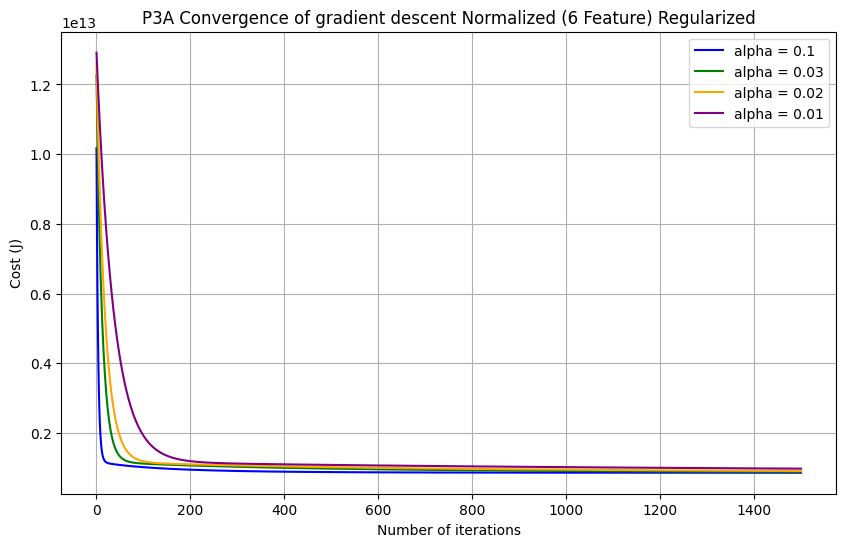

Final value of theta is:  [3044833.64790003 2371971.22018296 1005896.74462171 2179538.92882741
 1442645.55000901  903317.07953468]
Cost History:  [1.22701782e+13 1.13794396e+13 1.05603098e+13 ... 8.81366533e+11
 8.81331628e+11 8.81296778e+11]
Test Cost:  [2.90741598e+12 2.68924913e+12 2.48878645e+12 ... 1.97836453e+11
 1.97836885e+11 1.97837319e+11]


In [2420]:
#Normalized with Regulation (6 features)
thetaP2ANorm_1 = np.zeros(6);
Beta = 10;

iterationsP2ANorm = 1500;

alphaP2ANorm_1 = 0.1;
thetaP2ANorm_1, train_cost_historyP2ANorm_1, test_cost_historyP2ANorm_1 = gradient_descent_reg(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_1,alphaP2ANorm_1,iterationsP2ANorm,Beta)

plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_1, color='blue', label = 'alpha = 0.1')

thetaP2ANorm_2 = np.zeros(6);
alphaP2ANorm_2 = 0.03;
thetaP2ANorm_2, train_cost_historyP2ANorm_2, test_cost_historyP2ANorm_2 = gradient_descent_reg(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_2,alphaP2ANorm_2,iterationsP2ANorm,Beta)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_2, color='green', label = 'alpha = 0.03')

thetaP2ANorm_3 = np.zeros(6);
alphaP2ANorm_3 = 0.02;
thetaP2ANorm_3, train_cost_historyP2ANorm_3, test_cost_historyP2ANorm_3 = gradient_descent_reg(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_3,alphaP2ANorm_3,iterationsP2ANorm, Beta)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_3, color='orange', label = 'alpha = 0.02')

thetaP2ANorm_4 = np.zeros(6);
alphaP2ANorm_4 = 0.01;
thetaP2ANorm_4, train_cost_historyP2ANorm_4, test_cost_historyP2ANorm_4 = gradient_descent_reg(x[:,[0,1,2,3,4,11]],ytrain,xtest[:,[0,1,2,3,4,11]], ytest, thetaP2ANorm_4,alphaP2ANorm_4,iterationsP2ANorm, Beta)
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('P3A Convergence of gradient descent Normalized (6 Feature) Regularized')
plt.legend();
plt.show();

print('Final value of theta is: ',thetaP2ANorm_2);
print('Cost History: ', train_cost_historyP2ANorm_2);
print('Test Cost: ', test_cost_historyP2ANorm_2)


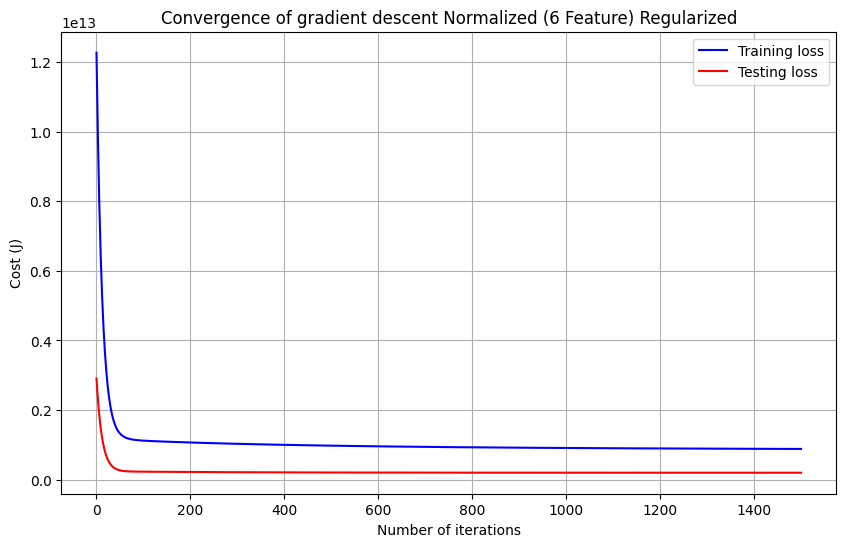

In [2421]:
#The code for regulated training vs validation .03 was better learning rate for 6 feat regularized
plt.plot(range(1, iterationsP2ANorm + 1), train_cost_historyP2ANorm_2, color='blue', label = 'Training loss')
plt.plot(range(1, iterationsP2ANorm + 1), test_cost_historyP2ANorm_2, color='red', label = 'Testing loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (6 Feature) Regularized')
plt.legend()

# Show the plot
plt.show()

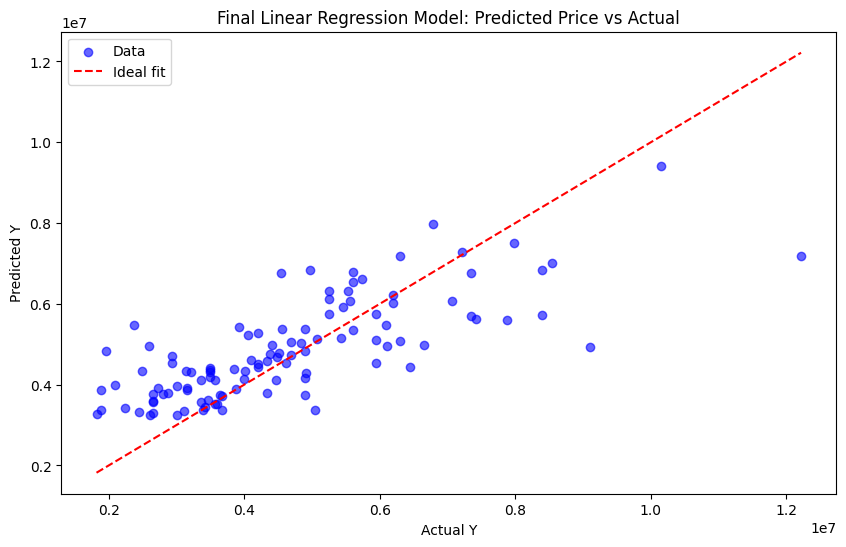

In [2422]:
Ypred = thetaP2ANorm_2[0] + thetaP2ANorm_2[1]*xtest[:,1] + thetaP2ANorm_2[2]*xtest[:,2] + thetaP2ANorm_2[3]*xtest[:,3] + thetaP2ANorm_2[4]*xtest[:,4] + thetaP2ANorm_2[5]*xtest[:,11]
plt.scatter(ytest, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()

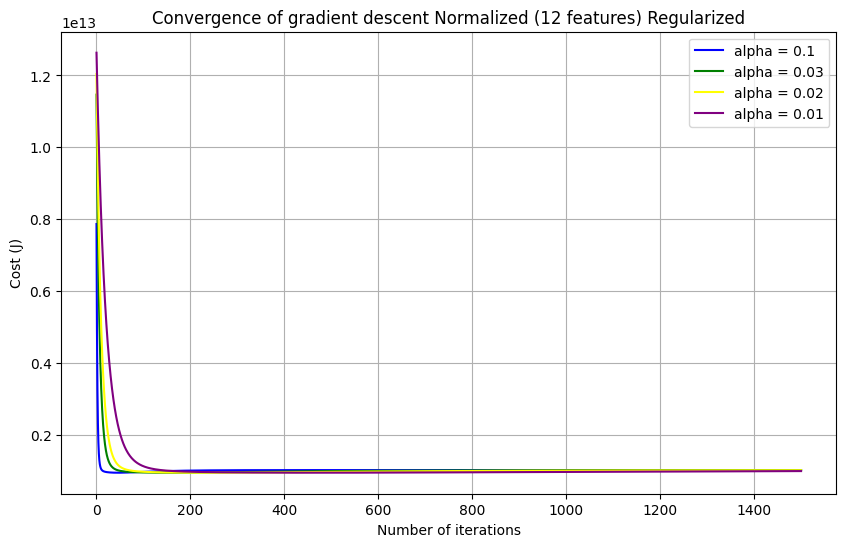

Final value of theta is:  [3452129.92027306  435160.97422158  260205.01463325  518332.8448644
  568446.95988695  418613.03585385  349180.50353479  232058.12647287
  199725.55003397  695133.91322922  465198.5018714   431928.62903892]
Cost History:  [1.14663240e+13 9.95716531e+12 8.67165311e+12 ... 1.02389863e+12
 1.02390034e+12 1.02390205e+12]
Test Cost:  [2.71123228e+12 2.34273508e+12 2.02948864e+12 ... 2.27267761e+11
 2.27268335e+11 2.27268907e+11]


In [2423]:
#add normalization 12 feature::
#exploration of alphas: for partB
#12 feature set normalized
Beta = 100;
thetaP2BNorm_1 = np.zeros(12);

iterationsP2BNorm = 1500;

alphaP2BNorm_1 = 0.1;
thetaP2BNorm_1, train_cost_historyP2BNorm_1, test_cost_historyP2BNorm_1 = gradient_descent_reg(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_1,alphaP2BNorm_1,iterationsP2BNorm, Beta)

plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_1, color='blue', label = 'alpha = 0.1')

thetaP2BNorm_2 = np.zeros(12);
alphaP2BNorm_2 = 0.03;
thetaP2BNorm_2, train_cost_historyP2BNorm_2, test_cost_historyP2BNorm_2 = gradient_descent_reg(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_2,alphaP2BNorm_2,iterationsP2BNorm,Beta)
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_2, color='green', label = 'alpha = 0.03')

thetaP2BNorm_3 = np.zeros(12);
alphaP2BNorm_3 = 0.02;
thetaP2BNorm_3, train_cost_historyP2BNorm_3, test_cost_historyP2BNorm_3 = gradient_descent_reg(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_3,alphaP2BNorm_3,iterationsP2BNorm,Beta)
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_3, color='yellow', label = 'alpha = 0.02')

thetaP2BNorm_4 = np.zeros(12);
alphaP2BNorm_4 = 0.01;
thetaP2BNorm_4, train_cost_historyP2BNorm_4, test_cost_historyP2BNorm_4 = gradient_descent_reg(x[:,0:12],ytrain,xtest[:,0:12], ytest, thetaP2BNorm_4,alphaP2BNorm_4,iterationsP2BNorm,Beta)
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (12 features) Regularized')
plt.legend();
plt.show();
print('Final value of theta is: ',thetaP2BNorm_2);
print('Cost History: ', train_cost_historyP2BNorm_2);
print('Test Cost: ', test_cost_historyP2BNorm_2)

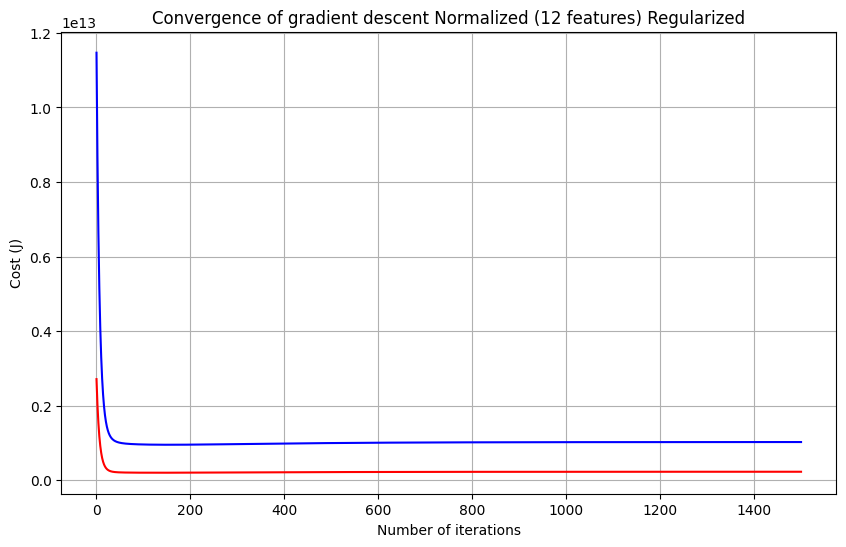

In [2424]:
#the training vs validation with regulation .03 best learning rate
plt.plot(range(1, iterationsP2BNorm + 1), train_cost_historyP2BNorm_2, color='blue')
plt.plot(range(1, iterationsP2BNorm + 1), test_cost_historyP2BNorm_2, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Normalized (12 features) Regularized')


# Show the plot
plt.show()

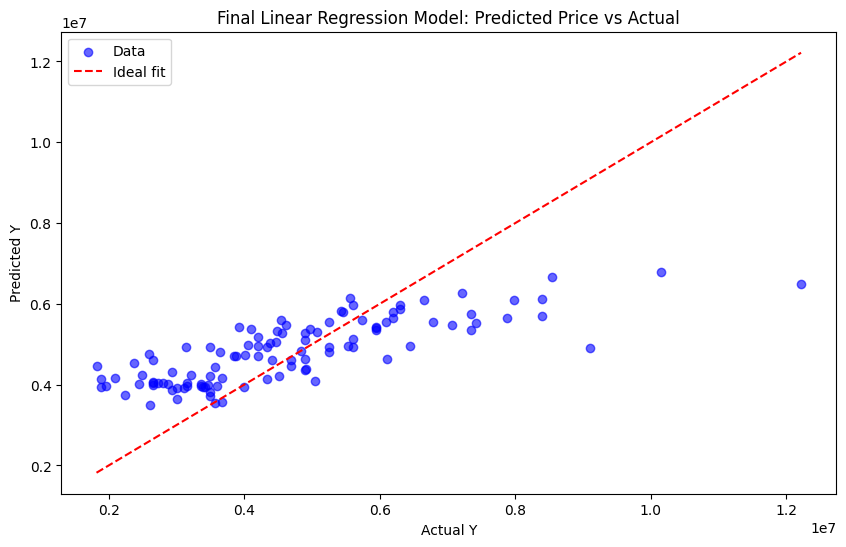

In [2425]:
Ypred = thetaP2BNorm_2[0] + thetaP2BNorm_2[1]*xtest[:,1] + thetaP2BNorm_2[2]*xtest[:,2] + thetaP2BNorm_2[3]*xtest[:,3] + thetaP2BNorm_2[4]*xtest[:,4] + thetaP2BNorm_2[5]*xtest[:,5] + thetaP2BNorm_2[6]*xtest[:,6] + thetaP2BNorm_2[7]*xtest[:,7] + thetaP2BNorm_2[8]*xtest[:,8] + thetaP2BNorm_2[9]*xtest[:,9] + thetaP2BNorm_2[10]*xtest[:,10] + thetaP2BNorm_2[11]*xtest[:,11]
plt.scatter(ytest, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()



In [2426]:
###Problem 3 Standardized x = x - u /s
# s = sqrt(sum(x-u)/N)

from sklearn.model_selection import train_test_split
from google.colab import drive
#call data set convert binary to 1 0, unfin,semifin,furn 0-1
filepath = '/content/drive/My Drive/IntroToMLDataSets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))
dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})
dataset.head()
np.random.seed(0) #randomize the set order
df_trainStand, df_testStand = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100) #split set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ##normalized here


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_trainStand[num_vars] = scaler.fit_transform(df_trainStand[num_vars])

#df_trainStand = (df_trainStand - df_trainStand.mean())/df_trainStand.std()

#testing data standardized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ##normalized here
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_testStand[num_vars] = scaler.fit_transform(df_testStand[num_vars])
#df_testStand = (df_test - df_test.mean())/df_test.std()

ytestStand = df_testStand.pop('price');
ytestStand = ytestStand.to_numpy();
xtestStand = df_testStand;

ytrainStand = df_trainStand.pop('price');
ytrainStand = ytrainStand.to_numpy();
xtrainStand = df_trainStand

n = len(xtrainStand)
m = len(ytrainStand)
l = len(xtestStand)
k = len(ytestStand)

x0 = np.ones((m,1));
x0test = np.ones((l,1));

xtrainStand  = np.hstack((x0,xtrainStand));
xtestStand = np.hstack((x0test,xtestStand));



/tmp/ipython-input-1370811189.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'yes' :1, 'no':0, 'furnished':1,'semi-furnished':0.5, 'unfurnished':0})


Final value of theta is:  [4632808.97523748  741444.45345676  112336.47904333  654660.71084688
  423156.14948772  703255.95048007]
Cost History:  [1.24192583e+13 1.16550651e+13 1.09423310e+13 ... 7.45336188e+11
 7.45336204e+11 7.45336219e+11]
Test Cost:  [2.94273279e+12 2.75456452e+12 2.57934809e+12 ... 1.91968584e+11
 1.91968611e+11 1.91968637e+11]


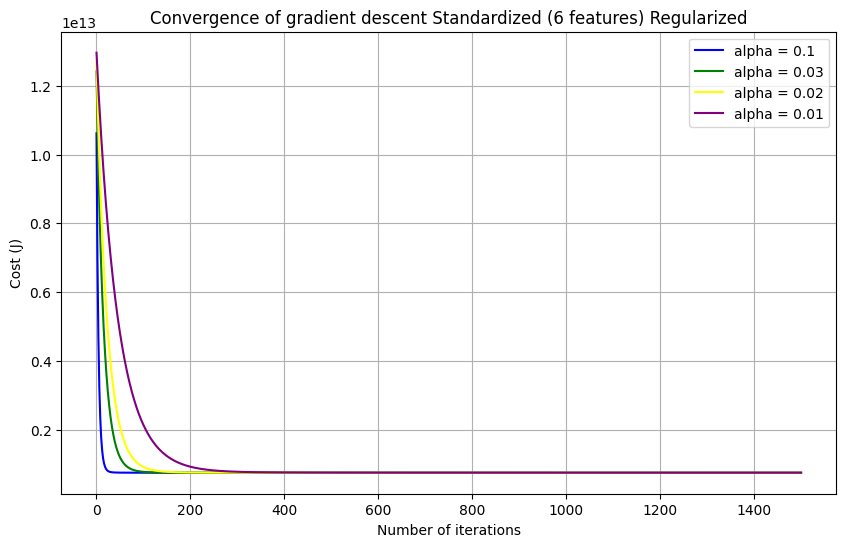

In [2427]:
#6 feature set, 2A standardized
#setting thetas and training rate
#setting thetas and training rate
thetaP2AStand_1 = np.zeros(6);
Beta = 10;

iterationsP2AStand = 1500;


alphaP2AStand_1 = 0.1;
thetaP2AStand_1, train_cost_historyP2AStand_1, test_cost_historyP2AStand_1 = gradient_descent_reg(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_1,alphaP2AStand_1,iterationsP2AStand, Beta)

plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_1, color='blue', label = 'alpha = 0.1')


thetaP2AStand_2 = np.zeros(6);
alphaP2AStand_2 = 0.03;
thetaP2AStand_2, train_cost_historyP2AStand_2, test_cost_historyP2AStand_2 = gradient_descent_reg(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_2,alphaP2AStand_2,iterationsP2AStand,Beta)
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_2, color='green', label = 'alpha = 0.03')
print('Final value of theta is: ',thetaP2AStand_2);
print('Cost History: ', train_cost_historyP2AStand_2);
print('Test Cost: ', test_cost_historyP2AStand_2)

thetaP2AStand_3 = np.zeros(6);
alphaP2AStand_3 = 0.02;
thetaP2AStand_3, train_cost_historyP2AStand_3, test_cost_historyP2AStand_3 = gradient_descent_reg(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_3,alphaP2AStand_3,iterationsP2AStand,Beta)
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_3, color='yellow', label = 'alpha = 0.02')


thetaP2AStand_4 = np.zeros(6);
alphaP2AStand_4 = 0.01;
thetaP2AStand_4, train_cost_historyP2AStand_4, test_cost_historyP2AStand_4 = gradient_descent_reg(xtrainStand[:,[0,1,2,3,4,11]],ytrainStand,xtestStand[:,[0,1,2,3,4,11]], ytestStand, thetaP2AStand_4,alphaP2AStand_4,iterationsP2AStand,Beta)
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (6 features) Regularized')
plt.legend();
plt.show();



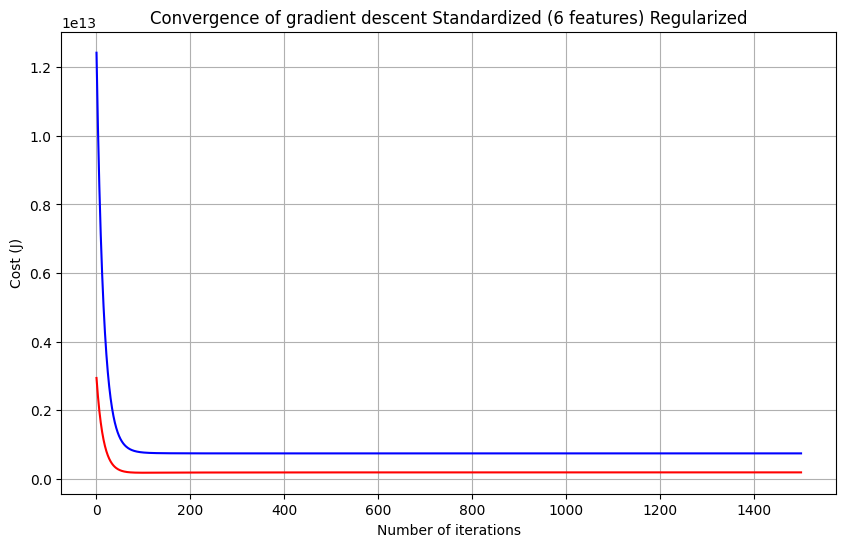

In [2428]:
##training vs validation 6feature .02 best learning rate
plt.plot(range(1, iterationsP2AStand + 1), train_cost_historyP2AStand_2, color='blue')
plt.plot(range(1, iterationsP2AStand + 1), test_cost_historyP2AStand_2, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (6 features) Regularized')


# Show the plot
plt.show()

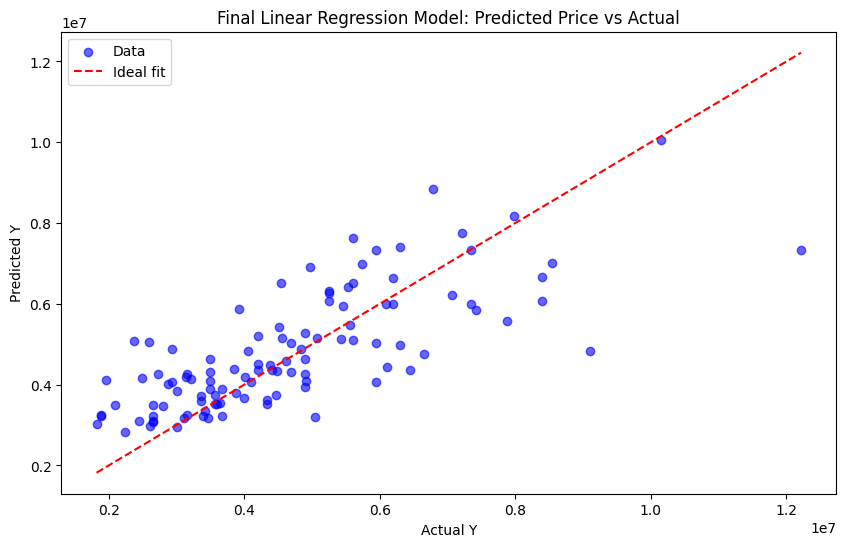

In [2429]:
Ypred = thetaP2AStand_2[0] + thetaP2AStand_2[1]*xtestStand[:,1] + thetaP2AStand_2[2]*xtestStand[:,2] + thetaP2AStand_2[3]*xtestStand[:,3] + thetaP2AStand_2[4]*xtestStand[:,4] + thetaP2AStand_2[5]*xtestStand[:,11]
plt.scatter(ytestStand, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytestStand), max(ytestStand)], [min(ytestStand), max(ytestStand)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Final Linear Regression Model: Predicted Price vs Actual")
plt.legend()
plt.show()



Final value of theta is:  [3715808.20232355  534852.36888929   80437.9193553   576300.98176425
  373014.40793252  593492.50004092  352154.68250891  312725.06370788
  593479.35581578  778057.19800729  230858.74368036  542862.87086655]
Cost History:  [1.16488180e+13 1.02621263e+13 9.05264483e+12 ... 5.77563188e+11
 5.77563566e+11 5.77563945e+11]
Test Cost:  [2.75116616e+12 2.40899613e+12 2.11164835e+12 ... 1.47054645e+11
 1.47052690e+11 1.47050739e+11]


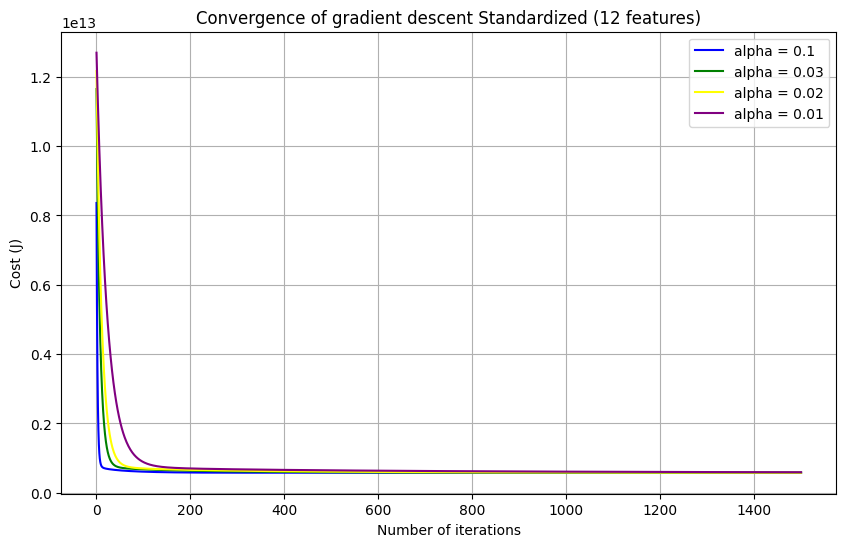

In [2430]:
#6 feature set, 2B standardized
#setting thetas and training rate
#setting thetas and training rate
thetaP2BStand_1 = np.zeros(12);
Beta = 10;



iterationsP2BStand = 1500;




alphaP2BStand_1 = 0.1;
thetaP2BStand_1, train_cost_historyP2BStand_1, test_cost_historyP2BStand_1 = gradient_descent_reg(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_1,alphaP2BStand_1,iterationsP2BStand,Beta)

plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_1, color='blue', label = 'alpha = 0.1')

thetaP2BStand_2 = np.zeros(12);
alphaP2BStand_2 = 0.03;
thetaP2BStand_2, train_cost_historyP2BStand_2, test_cost_historyP2BStand_2 = gradient_descent_reg(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_2,alphaP2BStand_2,iterationsP2BStand,Beta)
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_2, color='green', label = 'alpha = 0.03')
print('Final value of theta is: ',thetaP2BStand_2);
print('Cost History: ', train_cost_historyP2BStand_2);
print('Test Cost: ', test_cost_historyP2BStand_2)
thetaP2BStand_3 = np.zeros(12);
alphaP2BStand_3 = 0.02;
thetaP2BStand_3, train_cost_historyP2BStand_3, test_cost_historyP2BStand_3 = gradient_descent_reg(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_3,alphaP2BStand_3,iterationsP2BStand,Beta)
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_3, color='yellow', label = 'alpha = 0.02')

thetaP2BStand_4 = np.zeros(12);
alphaP2BStand_4 = 0.01;
thetaP2BStand_4, train_cost_historyP2BStand_4, test_cost_historyP2BStand_4 = gradient_descent_reg(xtrainStand[:,0:12],ytrainStand,xtestStand[:,0:12], ytestStand, thetaP2BStand_4,alphaP2BStand_4,iterationsP2BStand,Beta)
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_4, color='purple', label = 'alpha = 0.01')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (12 features)')
plt.legend();
plt.show();



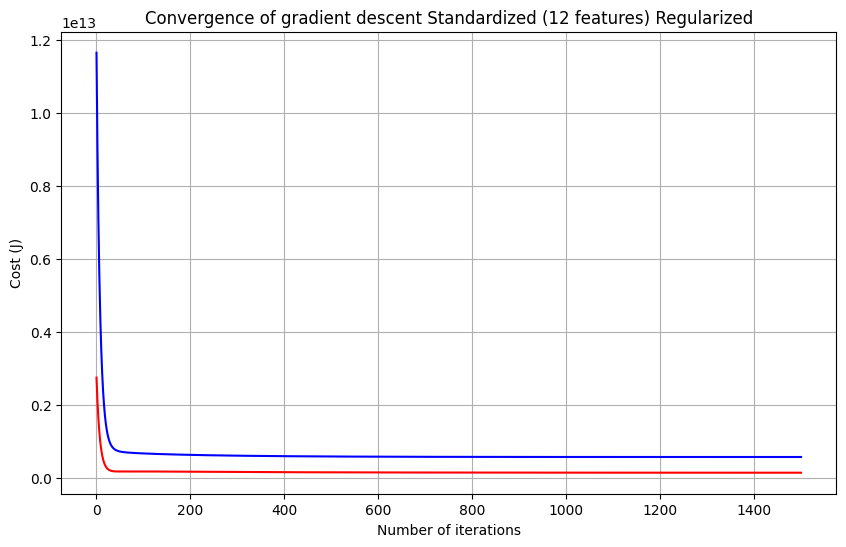

In [2431]:
plt.plot(range(1, iterationsP2BStand + 1), train_cost_historyP2BStand_2, color='blue')
plt.plot(range(1, iterationsP2BStand + 1), test_cost_historyP2BStand_2, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)




plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Standardized (12 features) Regularized')




# Show the plot
plt.show()

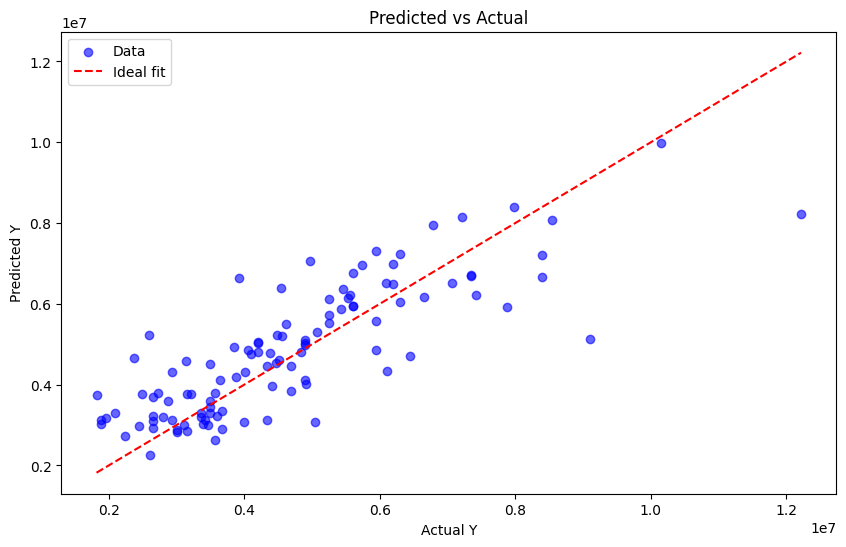

In [2432]:
Ypred = thetaP2BStand_2[0] + thetaP2BStand_2[1]*xtestStand[:,1] + thetaP2BStand_2[2]*xtestStand[:,2] + thetaP2BStand_2[3]*xtestStand[:,3] + thetaP2BStand_2[4]*xtestStand[:,4] + thetaP2BStand_2[5]*xtestStand[:,5] + thetaP2BStand_2[6]*xtestStand[:,6] + thetaP2BStand_2[7]*xtestStand[:,7] + thetaP2BStand_2[8]*xtestStand[:,8] + thetaP2BStand_2[9]*xtestStand[:,9] + thetaP2BStand_2[10]*xtestStand[:,10] + thetaP2BStand_2[11]*xtestStand[:,11]
plt.scatter(ytestStand, Ypred, color="blue", alpha=0.6, label="Data")
plt.plot([min(ytestStand), max(ytestStand)], [min(ytestStand), max(ytestStand)], "r--", label="Ideal fit")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

